<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/govind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('/content/lake water level data.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [84]:
df.head()


,level
DATE,
Jan-18,174.59
Feb-18,174.74
Mar-18,174.84
Apr-18,174.84
May-18,175.00


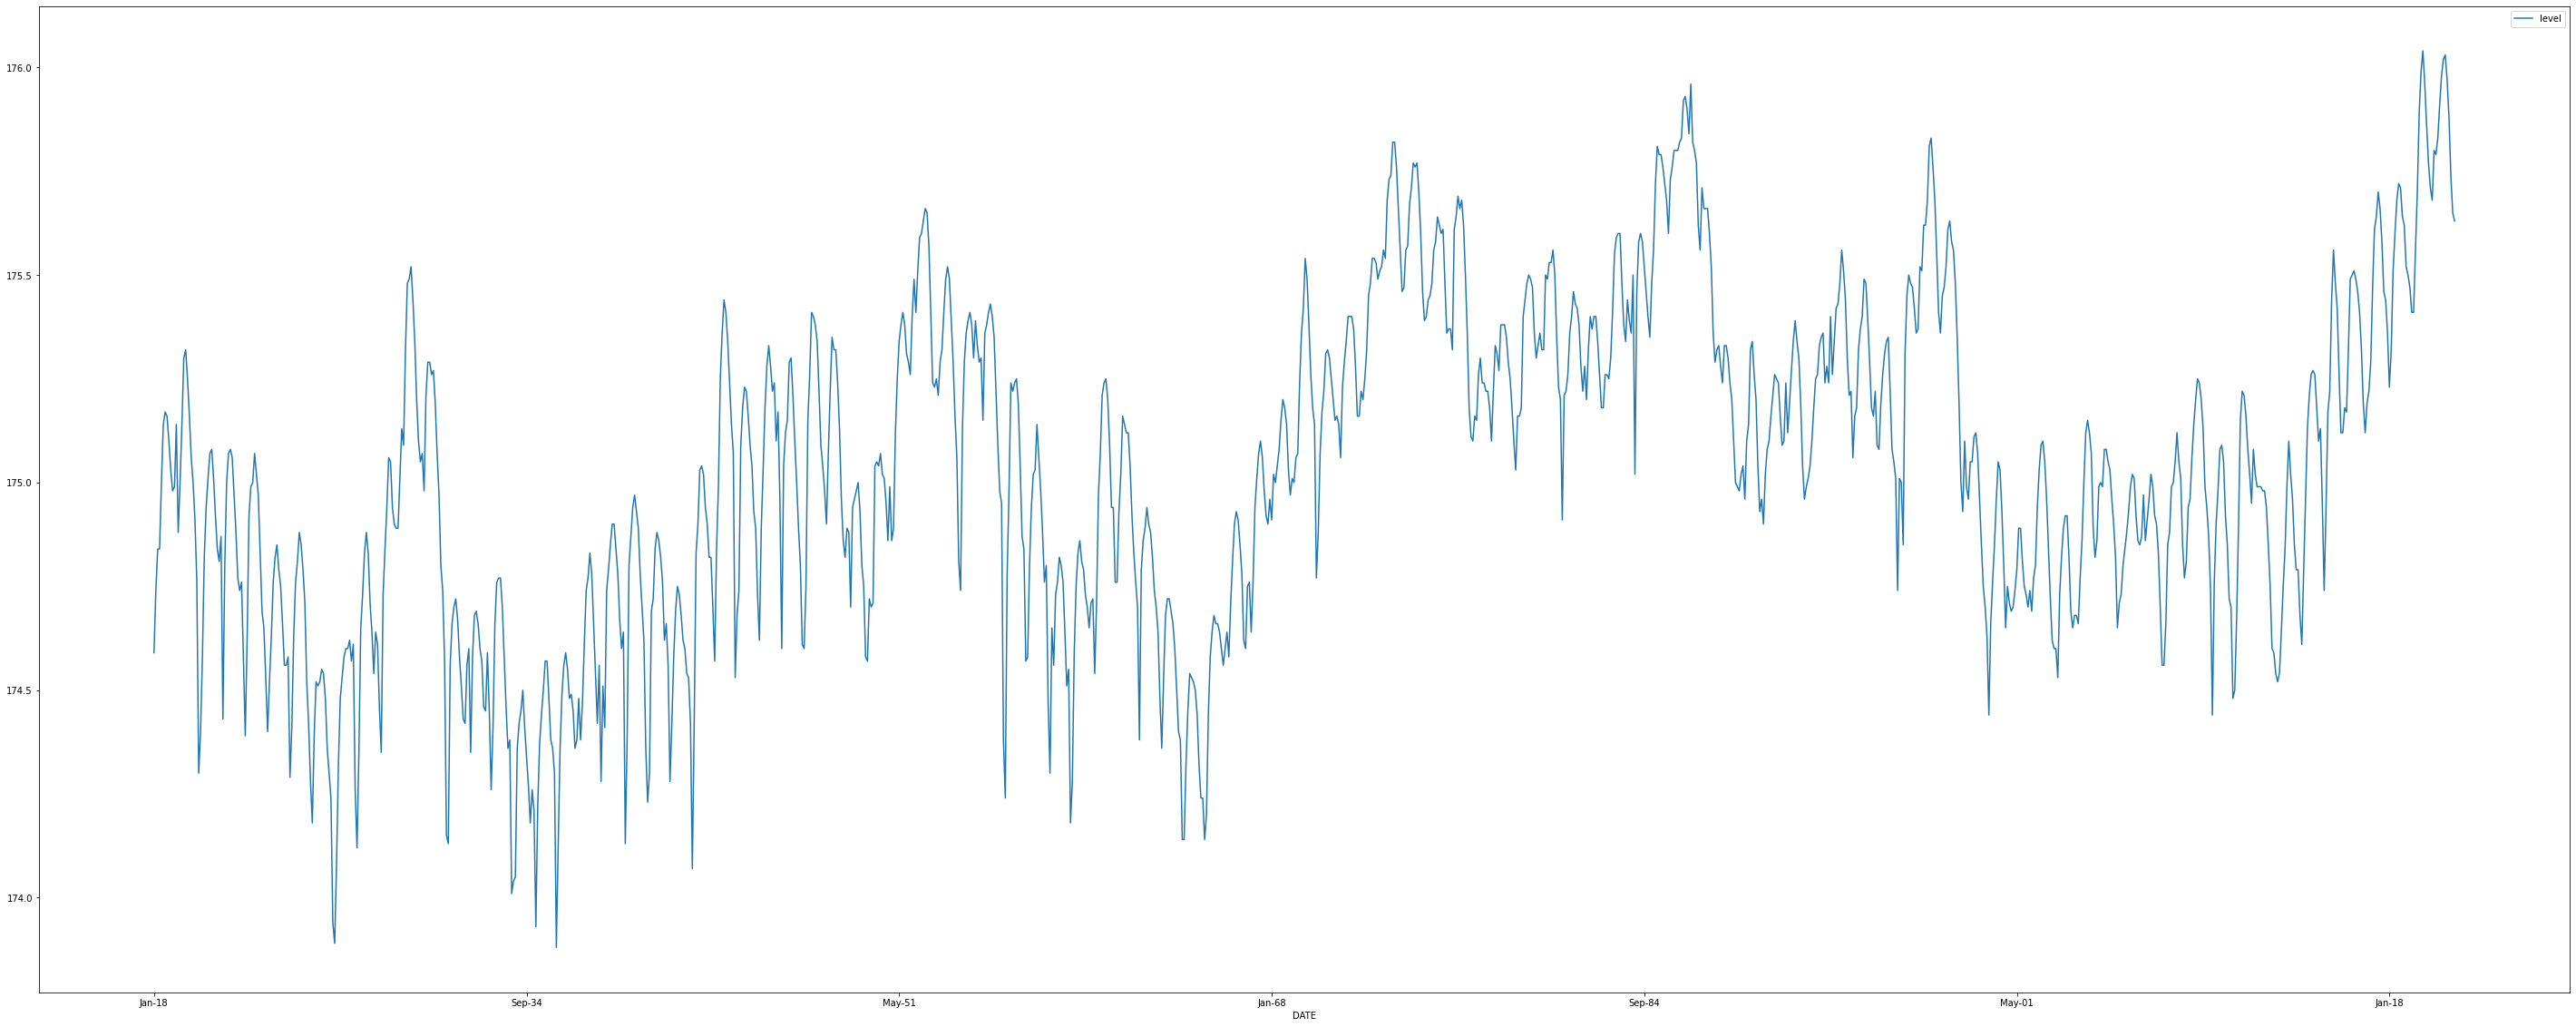

In [85]:
df.plot(figsize=(50,20))


In [86]:
len(df)


1236

In [87]:
train = df.iloc[:1000]
test = df.iloc[1000:]

In [88]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [89]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [91]:
scaled_train[:10]


array([[0.34134615],
       [0.41346154],
       [0.46153846],
       [0.46153846],
       [0.53846154],
       [0.60576923],
       [0.62019231],
       [0.61538462],
       [0.58653846],
       [0.55288462]])

In [92]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [93]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [94]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.34134615 0.41346154 0.46153846]
Predict this y: 
 [[0.46153846]]


In [95]:
X.shape


(1, 3, 1)

In [96]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [98]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [100]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
988/988 [==============================] - 7s 5ms/step - loss: 0.0161
Epoch 2/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0069
Epoch 3/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 4/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0041
Epoch 5/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0039
Epoch 6/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0034
Epoch 7/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0035
Epoch 8/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0033
Epoch 9/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0033
Epoch 10/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0031
Epoch 11/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0032
Epoch 12/50
988/988 [==============================] - 5s 5ms/step - loss: 0.0031
Epoch 13/50
988/988 [====

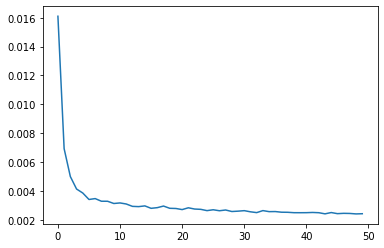

In [101]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [102]:
last_train_batch = scaled_train[-12:]

In [103]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [104]:
model.predict(last_train_batch)


array([[0.43835384]], dtype=float32)

In [105]:
scaled_test[0]

array([0.4375])

In [106]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [107]:
test_predictions


[array([0.43835384], dtype=float32),
 array([0.44718468], dtype=float32),
 array([0.45726377], dtype=float32),
 array([0.47014904], dtype=float32),
 array([0.48109025], dtype=float32),
 array([0.48729926], dtype=float32),
 array([0.49526876], dtype=float32),
 array([0.49596745], dtype=float32),
 array([0.49547917], dtype=float32),
 array([0.4966733], dtype=float32),
 array([0.5003434], dtype=float32),
 array([0.5063912], dtype=float32),
 array([0.514092], dtype=float32),
 array([0.52568305], dtype=float32),
 array([0.5403221], dtype=float32),
 array([0.555778], dtype=float32),
 array([0.5687754], dtype=float32),
 array([0.5789362], dtype=float32),
 array([0.58490235], dtype=float32),
 array([0.5870607], dtype=float32),
 array([0.586417], dtype=float32),
 array([0.58465904], dtype=float32),
 array([0.58350194], dtype=float32),
 array([0.58460987], dtype=float32),
 array([0.58904195], dtype=float32),
 array([0.59737986], dtype=float32),
 array([0.60860103], dtype=float32),
 array([0.6215

In [108]:
test.head()


,level
DATE,
May-01,174.79
Jun-01,174.89
Jul-01,174.89
Aug-01,174.81
Sep-01,174.75


In [109]:
true_predictions = scaler.inverse_transform(test_predictions)


In [110]:
test['Predictions'] = true_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


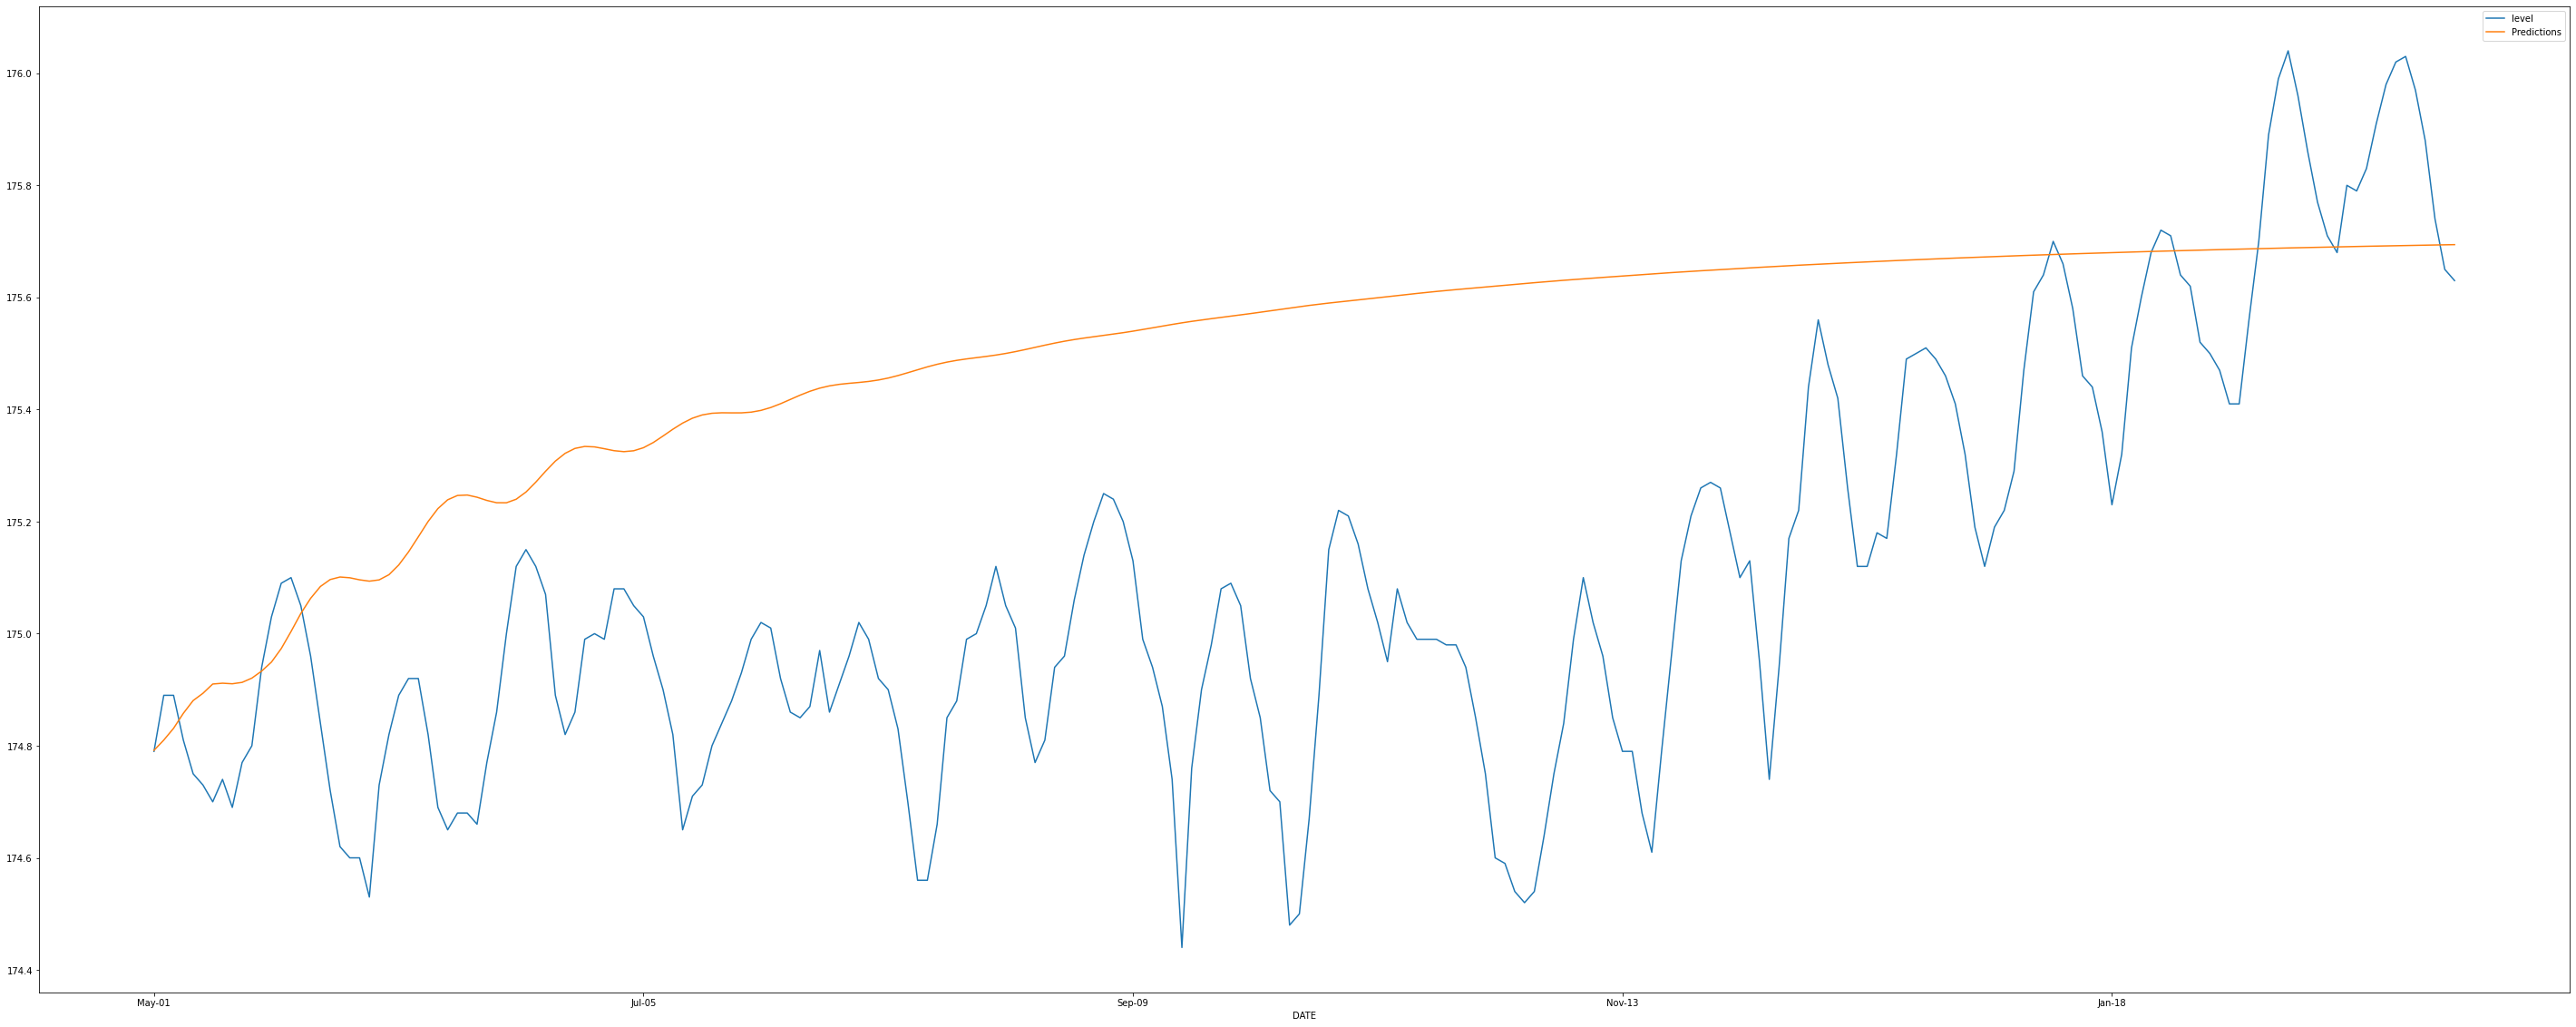

In [112]:
test.plot(figsize=(50,20))


In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['level'],test['Predictions']))
print(rmse)

0.5115639296351845
